<a href="https://colab.research.google.com/github/ajaysaikiran2208/Natural-Language-Processing/blob/main/Implementation_of_word2vec_in_gensim_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementation of  word2vec in Gensim

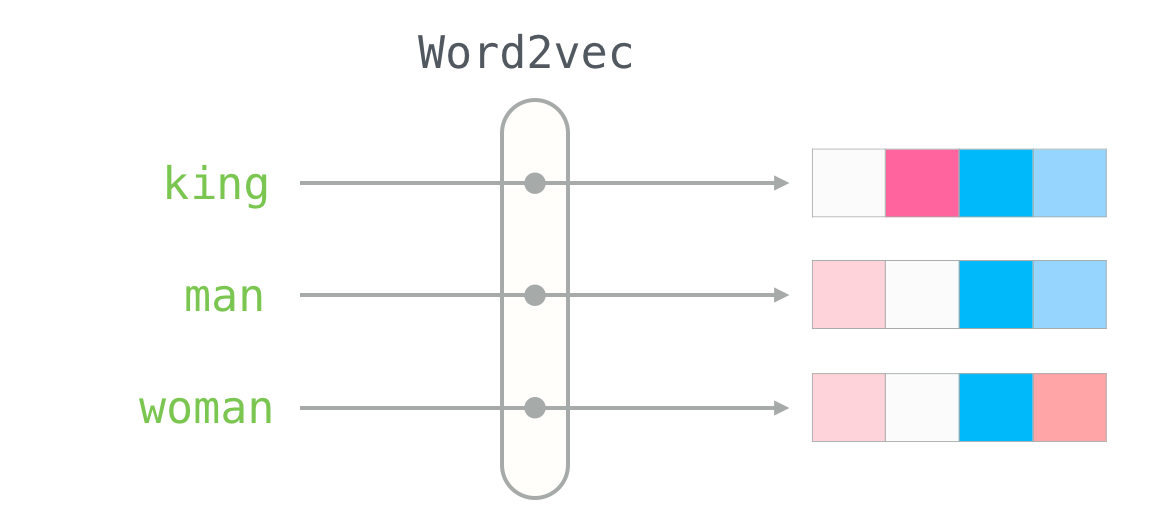

Word2vec is a set of algorithms to produce word embeddings, which are nothing more than vector representations of words. The idea of word2vec, and word embeddings in general, is to use the context of surrounding words and identify semantically similar words since they're likely to be in the same neighbourhood in vector space.

Word2vec has two models for deriving word embeddings.

    1.Continous bag of words [CBOW]
    
    2.Skip Gram


In [3]:
import pandas as pd
import gensim

In [4]:
!pip install python-Levenshtein

In [5]:
df=pd.read_json("/content/Cell_Phones_and_Accessories_5.json",lines=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [6]:
df.shape

(194439, 9)

#We are Interested on ReviewText

In [7]:
df.reviewText

0         They look good and stick good! I just don't li...
1         These stickers work like the review says they ...
2         These are awesome and make my phone look so st...
3         Item arrived in great time and was in perfect ...
4         awesome! stays on, and looks great. can be use...
                                ...                        
194434    Works great just like my original one. I reall...
194435    Great product. Great packaging. High quality a...
194436    This is a great cable, just as good as the mor...
194437    I really like it becasue it works well with my...
194438    product as described, I have wasted a lot of m...
Name: reviewText, Length: 194439, dtype: object

# Pre-Processing of the data

In [8]:
final_text=df.reviewText.apply(gensim.utils.simple_preprocess)


# Initializing model

In [10]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2, workers=4,
    )

In [11]:
model.build_vocab(final_text,progress_per=1000
    
)

In [12]:
model.epochs

5

In [13]:
model.corpus_count

194439

In [14]:
model.train(final_text,total_examples=model.corpus_count,epochs=model.epochs)

(61502635, 83868975)

In [15]:
model.save("amazon_review.model")

In [17]:
model.wv.most_similar("mobile")

[('prepaid', 0.7756739854812622),
 ('gsm', 0.7249324321746826),
 ('virgin', 0.711871862411499),
 ('cellular', 0.7103170156478882),
 ('att', 0.7009259462356567),
 ('metropcs', 0.6954330801963806),
 ('uma', 0.6896066665649414),
 ('tmobile', 0.6841733455657959),
 ('metro', 0.6827295422554016),
 ('lte', 0.6770896315574646)]

In [20]:
model.wv.similarity(w1='bad',w2='good')

0.5798321